In [18]:
a=int(2251262633%8+1)
print(a)

2


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt

In [20]:
df= pd.read_csv (r"C:\Users\admin\OneDrive\Time_series\heart_rate.csv ")
df.head()

,T1,T2,T3,T4
0,84.2697,91.4634,60.4839,59.2885
1,84.2697,91.4634,60.4839,59.2885
2,84.0619,91.1834,60.4606,59.2885
3,85.6542,91.8788,60.3391,58.8973
4,87.2093,91.1772,60.0762,58.4359


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T1      1800 non-null   float64
 1   T2      1800 non-null   float64
 2   T3      950 non-null    float64
 3   T4      891 non-null    float64
dtypes: float64(4)
memory usage: 56.4 KB


In [22]:
df.isnull().sum()

T1      0
T2      0
T3    850
T4    909
dtype: int64

In [23]:
columns_1=["T3","T4"]
for col_1 in columns_1:
    df[col_1]= df[col_1].interpolate(method='linear')

In [24]:
df.head(10)

,T1,T2,T3,T4
0,84.2697,91.4634,60.4839,59.2885
1,84.2697,91.4634,60.4839,59.2885
2,84.0619,91.1834,60.4606,59.2885
3,85.6542,91.8788,60.3391,58.8973
4,87.2093,91.1772,60.0762,58.4359
5,87.1246,89.7992,59.2526,58.7312
6,86.8726,90.3571,58.6644,59.1926
7,86.7052,92.0227,59.1295,58.9342
8,87.5899,91.9105,59.6737,58.4728
9,89.1475,91.1410,60.7760,57.8148


In [25]:
df.isnull().sum()

T1    0
T2    0
T3    0
T4    0
dtype: int64

In [26]:

df_normalized = (df - df.min()) / (df.max()-df.min())
df_normalized

,T1,T2,T3,T4
0,0.325129,0.455794,0.359153,0.260034
1,0.325129,0.455794,0.359153,0.260034
2,0.318892,0.444449,0.358157,0.260034
3,0.366681,0.472625,0.352963,0.244073
4,0.413354,0.444198,0.341723,0.225247
...,...,...,...,...
1795,0.910983,0.748358,0.136575,0.370666
1796,0.845946,0.748358,0.136575,0.370666
1797,0.784267,0.761174,0.136575,0.370666
1798,0.772730,0.774414,0.136575,0.370666


In [27]:
def butter_filter(data, cutoff, fs, btype='low', order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype)
    return filtfilt(b, a, data)

In [28]:
fs = 2.0  
cutoff = 0.2

In [29]:
for col in df_normalized.columns:
    signal = df_normalized[col].values
    low_freq = butter_filter(signal, cutoff, fs, btype='low')
    high_freq = butter_filter(signal, cutoff, fs, btype='high')

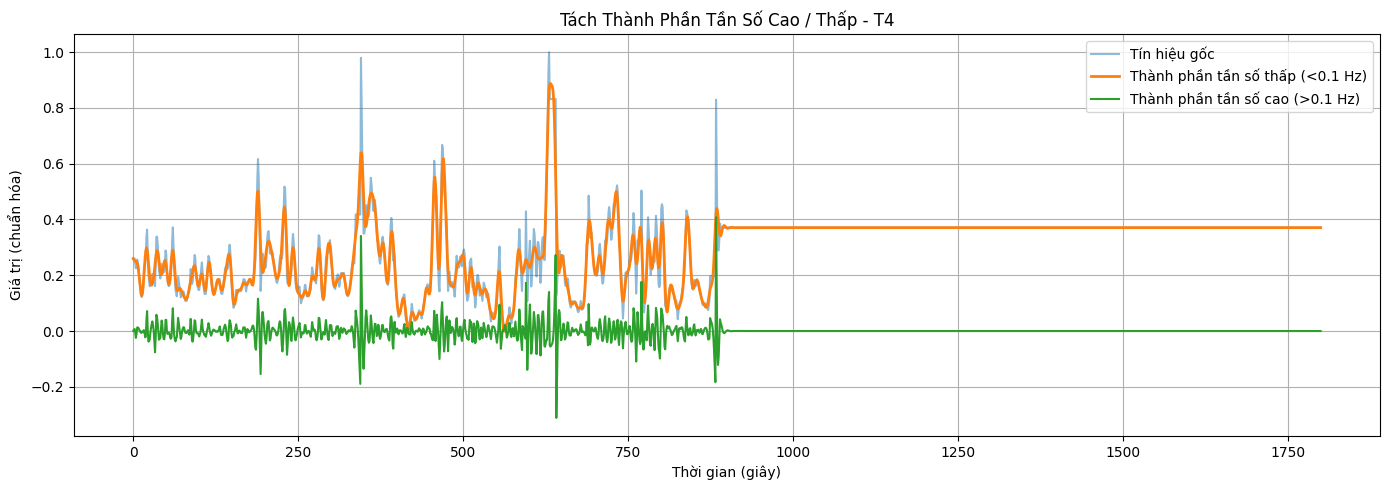

In [30]:
plt.figure(figsize=(14, 5))
plt.plot(signal, label='Tín hiệu gốc', alpha=0.5)
plt.plot(low_freq, label='Thành phần tần số thấp (<0.1 Hz)', linewidth=2)
plt.plot(high_freq, label='Thành phần tần số cao (>0.1 Hz)', linewidth=1.5)
plt.title(f"Tách Thành Phần Tần Số Cao / Thấp - {col}")
plt.xlabel("Thời gian (giây)")
plt.ylabel("Giá trị (chuẩn hóa)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1700\1150655296.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


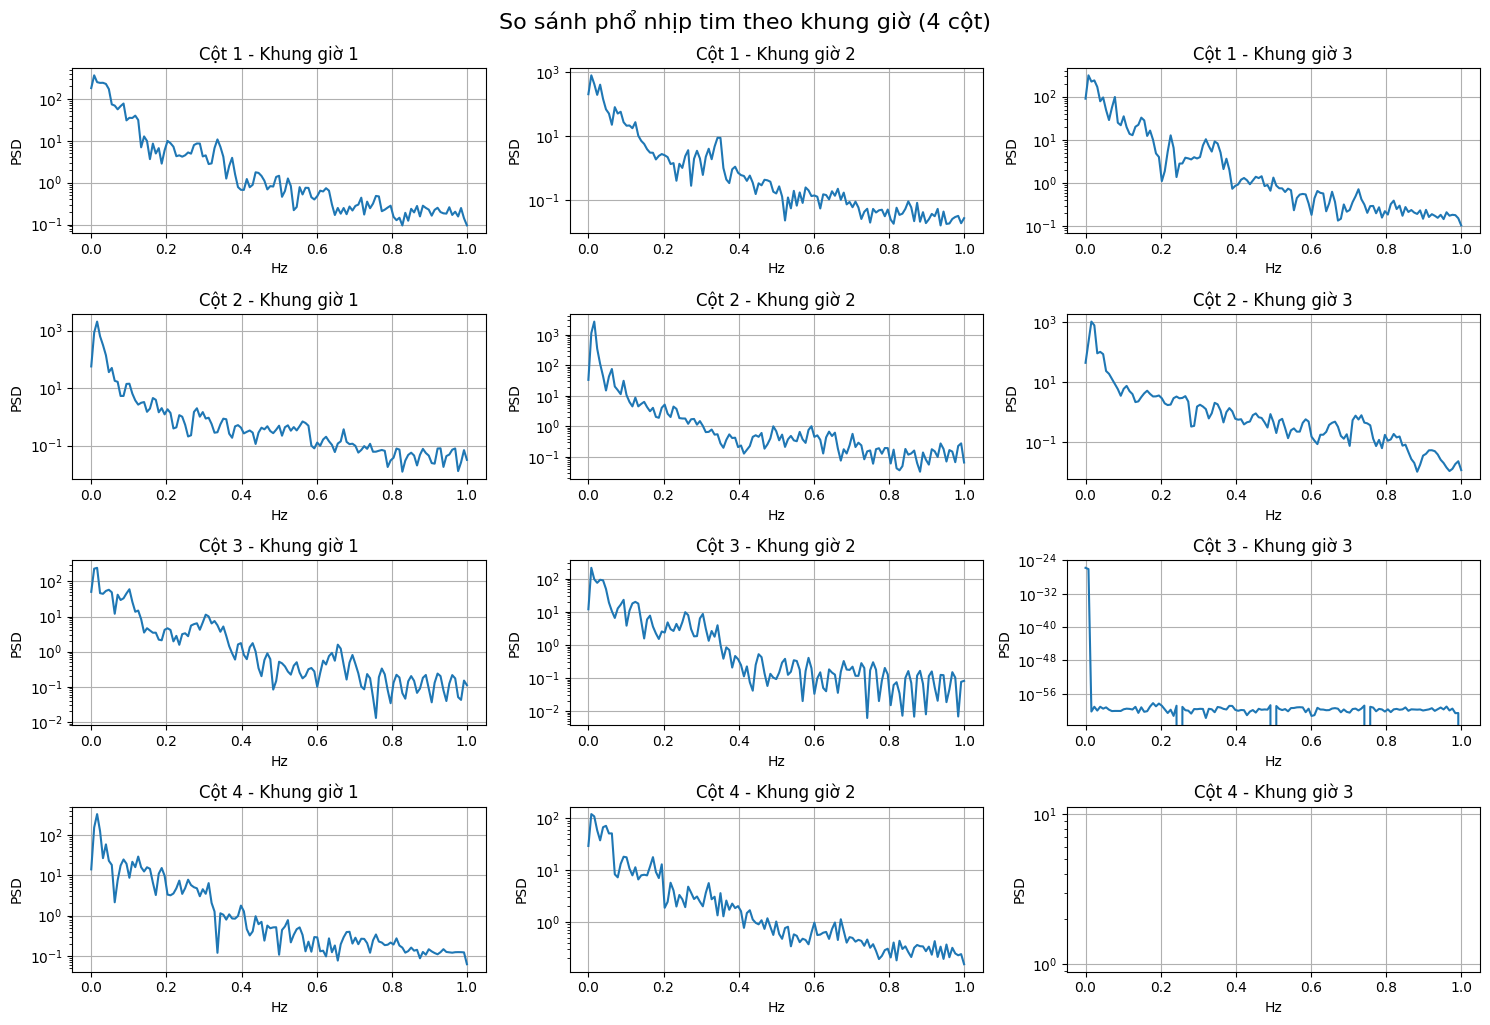

In [31]:
from scipy.signal import welch
fs = 2  
n_segments = 3 
plt.figure(figsize=(15, 10))

# Duyệt qua từng cột (chuỗi)
for col in range(4):
    signal = df.iloc[:, col].dropna().values
    segment_len = len(signal) // n_segments

    # Duyệt qua từng khung giờ trong chuỗi đó
    for seg in range(n_segments):
        segment = signal[seg*segment_len : (seg+1)*segment_len]
        f, Pxx = welch(segment, fs=fs, nperseg=256)

        plt.subplot(4, n_segments, col*n_segments + seg + 1)
        plt.semilogy(f, Pxx)
        plt.title(f'Cột {col+1} - Khung giờ {seg+1}')
        plt.xlabel('Hz')
        plt.ylabel('PSD')
        plt.grid(True)

plt.tight_layout()
plt.suptitle('So sánh phổ nhịp tim theo khung giờ (4 cột)', y=1.02, fontsize=16)
plt.show()

In [32]:
# fs = 1.0  # tần số mẫu (Hz)
# n = len(df_normalized)
# segment_len = n // 3
# frequencies = fftfreq(segment_len, d=1/fs)[:segment_len//2]

In [33]:
# fig, axs = plt.subplots(2, 2, figsize=(16, 10))
# axs = axs.flatten()
# for i, col in enumerate(df_normalized.columns):
#     signal = df_normalized[col].values
#     segments = [signal[j*segment_len:(j+1)*segment_len] for j in range(3)]
#     for j, seg in enumerate(segments):
#         fft_vals = fft(seg)
#         power = np.abs(fft_vals[:segment_len//2])
#         axs[i].plot(frequencies, power, label=f"Đoạn {j+1}")
#     axs[i].set_title(f"Phổ tần số của {col}")
#     axs[i].set_xlabel("Tần số (Hz)")
#     axs[i].set_ylabel("Biên độ")
#     axs[i].legend()
#     axs[i].grid(True)

# plt.tight_layout()
# plt.show()

In [34]:
for col in df_normalized.columns:
    signal = df_normalized[col].values
    high_freq = butter_filter(signal, 0.1, fs, btype='high')

    std_high = np.std(high_freq)
    max_high = np.max(np.abs(high_freq))

    print(f"{col}:")
    print(f"  - Độ lệch chuẩn tần số cao: {std_high:.4f}")
    print(f"  - Biên độ cao nhất tần số cao: {max_high:.4f}")

    # Ngưỡng cảnh báo (có thể điều chỉnh)
    if std_high > 0.15 or max_high > 0.3:
        print("    Cảnh báo: Có thể có bất thường!\n")
    else:
        print("    Tín hiệu bình thường.\n")


T1:
  - Độ lệch chuẩn tần số cao: 0.0472
  - Biên độ cao nhất tần số cao: 0.2965
    Tín hiệu bình thường.

T2:
  - Độ lệch chuẩn tần số cao: 0.0357
  - Biên độ cao nhất tần số cao: 0.2768
    Tín hiệu bình thường.

T3:
  - Độ lệch chuẩn tần số cao: 0.0418
  - Biên độ cao nhất tần số cao: 0.2592
    Tín hiệu bình thường.

T4:
  - Độ lệch chuẩn tần số cao: 0.0466
  - Biên độ cao nhất tần số cao: 0.4753
    Cảnh báo: Có thể có bất thường!

